**NEO ASSIGNMENT**

In [64]:
#!pip install plotly

In [65]:
#Importing libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [66]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Aspire 5s\\Downloads\\NioPracticeUserbase.csv")

In [67]:
# Explore the dataset
print(df.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None


***As there is no null value, we can say the data is preprocessed.
   Also in our dataset there are only 3 integer values***

In [69]:
# Bar chart for user demographics
gender_chart = px.bar(df, x="Gender", color="Gender", title="Number of Users by Gender",
                      labels={"Gender": "User Gender"})
gender_chart.update_layout(showlegend=False)

# Dropdown for filtering by country
gender_chart.update_layout(updatemenus=[dict(type='dropdown',
                                              active=0,
                                              buttons=list([
                                                  {'label': country, 'method': 'update', 'args': [{'visible': df['Country'] == country}]}
                                                  for country in df['Country'].unique()
                                              ]))])

gender_chart.show()

***Analyzing the demographic representation depicted above, we observe a significant user base originating from the United States and Canada. Within the United States, the user distribution leans towards the male category, while in Canada, the majority belongs to the female category. On an overall scale, there is an equitable contribution between male and female users.***

In [70]:
# Pie chart for subscription overview
subscription_chart = px.pie(df, names='Subscription Type', title='Proportion of Subscription Types',hover_data=['Plan Duration'])

# Dropdown for filtering by plan duration
subscription_chart.update_layout(updatemenus=[dict(type='dropdown',
                                                    active=0,
                                                    buttons=list([
                                                        {'label': duration, 'method': 'update',
                                                         'args': [{'visible': df['Plan Duration'] == duration}]}
                                                        for duration in df['Plan Duration'].unique()
                                                    ]))])

subscription_chart.show()

***In the pie chart above, it is evident that, among users opting for a 1-month subscription duration, the majority favor the basic subscription plan, over the standard and premium plans.***

In [71]:
# Line chart for monthly revenue trend
monthly_revenue_chart = px.line(df, x='Join Date', y='Monthly Revenue', title='Monthly Revenue Trend',
                                labels={'Monthly Revenue': 'Revenue'},
                                hover_data=['Subscription Type'], line_shape='linear')

# Checkbox for toggling between overall and segmented view
monthly_revenue_chart.update_layout(updatemenus=[dict(type='buttons',
                                                       active=0,
                                                       buttons=[
                                                           {'label': 'Overall', 'method': 'update',
                                                            'args': [{'visible': [True] * len(df['Subscription Type'].unique())}]},
                                                           {'label': 'Segmented', 'method': 'update',
                                                            'args': [{'visible': [False] * len(df['Subscription Type'].unique())}]},
                                                       ])])

monthly_revenue_chart.show()

In [72]:
df['Join Date'] = pd.to_datetime(df['Join Date'])

In [73]:
monthly_revenue = df.resample('M', on='Join Date').sum()['Monthly Revenue']

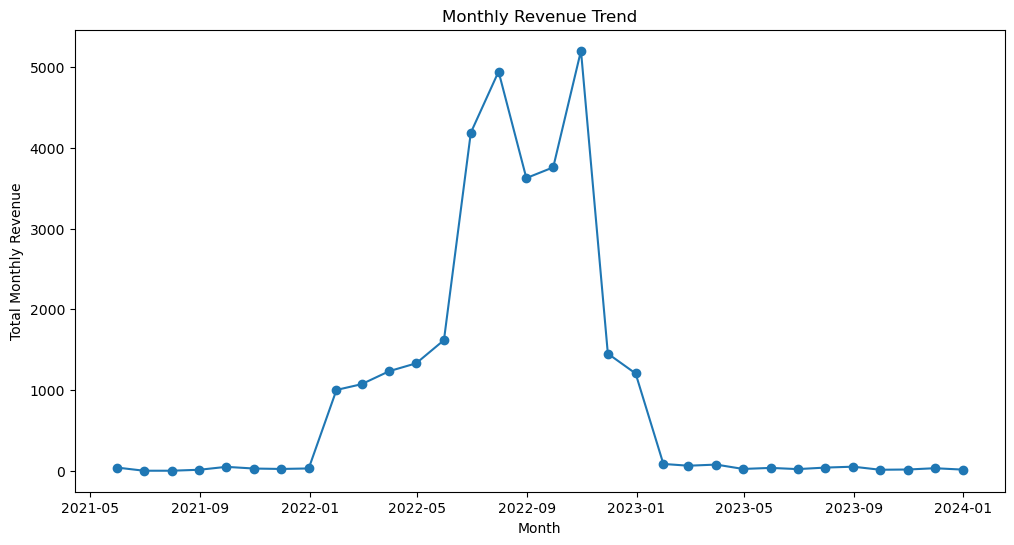

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Monthly Revenue')
plt.show()

***In the preceding analysis, it is evident that the revenue exhibited a peak in both the late and mid of 2022. While the graph shows a continuous upward trend from January 2022, it encountered fluctuations between May 2022 and the last quarter of 2022, eventually experiencing a decline at the beginning of 2023.***

In [75]:
# !pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)

# Define layout for the app
app.layout = html.Div(children=[
    dcc.Graph(id='gender-chart', figure=gender_chart),
    dcc.Graph(id='subscription-chart', figure=subscription_chart),
    dcc.Graph(id='monthly-revenue-chart', figure=monthly_revenue_chart)
])

if __name__ == '__main__':
    app.run_server(debug=True)